In [1]:
# Read loan data from lending club

import pandas as pd
loan_data = pd.read_csv('loan.csv')


C:\Users\mohan\Anaconda3\envs\cryptocurrency-analysis\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
loan_data = loan_data.loc[:, loan_data.isnull().mean() < .1]

Data
This dataset provides the loan information from lending club. The classification goal is to predict if the loan will default (1/0)(variable y). It includes 887379 records and 74 fields.

In [3]:
print(loan_data.shape)
print(list(loan_data.columns))

(887379, 52)
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [4]:
# Policy code would cause biase; Drop it
loan_data = loan_data.drop('policy_code', axis=1)

In [5]:
pd.set_option('display.max_columns', None)
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,Jan-2015,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [6]:
# Create a dictionary transform emp_length to float
emp_list = ['n/a','< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
num_list = [0,0.5,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]
emp_map = {}
for i in range(len(emp_list)):
    emp_map[emp_list[i]] = num_list[i]

In [7]:
loan_data['emp_length'] = loan_data['emp_length'].map(emp_map)

In [8]:
grade_list = ['A','B','C','D','E','F','G']
num_list = [1.0,2.0,3.0,4.0,5.0,6.0,7.0]
grade_map = {}
for i in range(len(grade_list)):
    grade_map[grade_list[i]] = num_list[i]

loan_data['grade'] = loan_data['grade'].map(grade_map)

In [9]:
loan_data['term'] = loan_data['term'].apply(lambda x: int(x.replace('months','')))


In [10]:
# Keep loan status == fully paid or charged off
loan_data = loan_data[(loan_data.loan_status == 'Fully Paid') | (loan_data.loan_status == 'Charged Off')]

In [11]:

# Verification Status Map
v_s_map = {'Not Verified':0.0,'Source Verified':1.0,'Verified':1.0 }
loan_data['verification_status'] = loan_data['verification_status'].map(v_s_map)

In [12]:
str_col = ['emp_title','issue_d','pymnt_plan','purpose','title','zip_code','url',
            'earliest_cr_line','last_pymnt_d','last_credit_pull_d']

# Drop Columns contains date
loan_data = loan_data.drop(str_col, axis=1)

In [13]:
# Create dictionary convert sub grade
l = ['A','B','C','D','E','F','G']
n = ['1','2','3','4','5']
sbg = []
for i in l:
    for j in n:
        sbg.append(i+j)
        
l_m = ['1','2','3','4','5','6','7']
n_m = ['0','2','4','6','8']

lm = {}
for i in range(len(l_m)):
    lm[l[i]] = l_m[i]

nm = {}
for i in range(len(n_m)):
    nm[n[i]] = n_m[i]
    
sbg_m = []
for i in sbg:
    sbg_m.append(lm[i[0]]+nm[i[1]])

subgrade_map = {}
for i in range(len(sbg)):
    subgrade_map[sbg[i]] = float(sbg_m[i])/10


In [14]:
loan_data['sub_grade'] = loan_data['sub_grade'].map(subgrade_map)

In [15]:
import numpy as np

class_mapping = {label:idx for idx, label in enumerate(np.unique(loan_data['addr_state']))}
loan_data['addr_state'] = loan_data['addr_state'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(loan_data['initial_list_status']))}
loan_data['initial_list_status'] = loan_data['initial_list_status'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(loan_data['home_ownership']))}
loan_data['home_ownership'] = loan_data['home_ownership'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(loan_data['application_type']))}
loan_data['application_type'] = loan_data['application_type'].map(class_mapping)

In [16]:
# Convert loan status:
l_s_map = {'Fully Paid':1.0, 'Charged Off': 0.0}
loan_data['loan_status'] = loan_data['loan_status'].map(l_s_map)

# Fill NaN with 0
loan_data = loan_data.fillna(0)

In [17]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36,10.65,162.87,2.0,2.2,10.0,5,24000.0,1.0,1.0,3,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0,0.0,0.0,0.0,0.0
1,1077430,1314167,2500.0,2500.0,2500.0,60,15.27,59.83,3.0,3.6,0.5,5,30000.0,1.0,0.0,10,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0,0.0,0.0,0.0,0.0
2,1077175,1313524,2400.0,2400.0,2400.0,36,15.96,84.33,3.0,3.8,10.0,5,12252.0,0.0,1.0,14,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0,0.0,0.0,0.0,0.0
3,1076863,1277178,10000.0,10000.0,10000.0,36,13.49,339.31,3.0,3.0,10.0,5,49200.0,1.0,1.0,4,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0,0.0,0.0,0.0,0.0
5,1075269,1311441,5000.0,5000.0,5000.0,36,7.90,156.46,1.0,1.6,3.0,5,36000.0,1.0,1.0,3,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,0,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,161.03,0.0,0,0.0,0.0,0.0,0.0


In [18]:
loan_data.to_csv('clean_loans.csv')  

In [19]:
features = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
            'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
            'annual_inc', 'verification_status', 'purpose', 'dti',
            'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util',
            'total_acc', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
            'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt',
            'total_rev_hi_lim', 'loan_status']

categorical = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
               'purpose', 'initial_list_status']

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
def corr_map(corr):
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 10))

    # Draw the heatmap with the mask and correct aspect ratio
    plt.title("Correlation Matrix", size=18)
    sns.heatmap(corr, mask=mask, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .6})    
    return plt.show()

In [22]:
pd.set_option('display.max_columns', None)
corr = loan_data.corr()

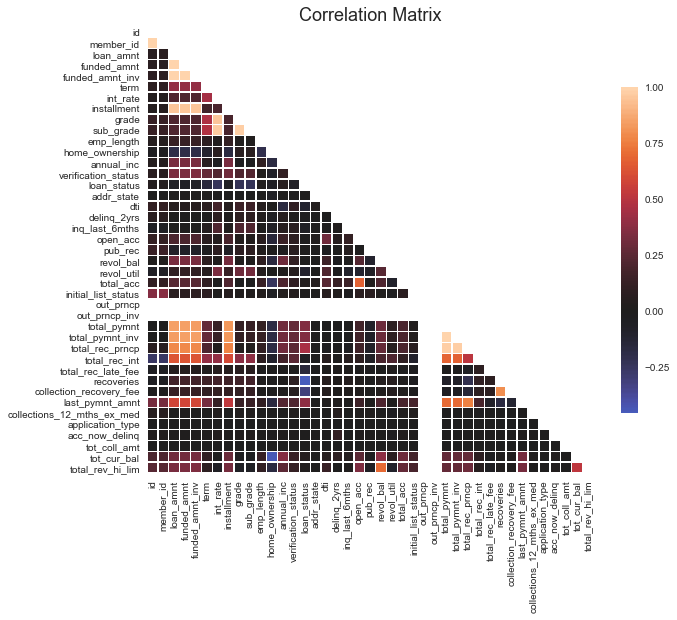

In [23]:
sns.set(style="whitegrid")
corr_map(corr)

In [24]:
### MLPClassifier ###
# Use the final clean dataframe: clean_df
from sklearn.model_selection import train_test_split
y= loan_data.loan_status
X = loan_data.drop(["loan_status"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=.25)

In [25]:
# Scaler Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [35]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions, normalize = True)
print(accuracy)
print(confusion_matrix(y_test,predictions))

0.998877346109
[[11311    67]
 [    4 51861]]


In [29]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00     11378
        1.0       1.00      1.00      1.00     51865

avg / total       1.00      1.00      1.00     63243



0 0.802650095663
[[10884   413]
 [12068 39878]]
1 0.802650095663
[[10884   413]
 [12068 39878]]
2 0.802650095663
[[10884   413]
 [12068 39878]]
3 0.802650095663
[[10884   413]
 [12068 39878]]
4 0.802650095663
[[10884   413]
 [12068 39878]]


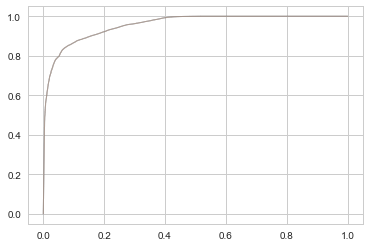

In [42]:
### Naive Bayes ###
# Use the same X and y above
# K-fold Cross-validation
import  sklearn.model_selection 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

total = []
# Create a k-fold object
nfold = 5
kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)

# Loop over the folds
for isplit, Ind in enumerate(kf.split(X)):
        
    # Get the training data in the split
    xtr, xts, ytr, yts = train_test_split(X, y, random_state=89, test_size=.25)
    
    clf = GaussianNB()
    clf.fit(xtr, ytr)
    y_pred = clf.predict(xts)
    acc = accuracy_score(y_pred, yts, normalize = True)
    #auc = metrics.roc_auc_score(target_test,target_pred)
    probas_ = clf.fit(xtr, ytr).predict_proba(xts)
    fpr, tpr, thresholds = roc_curve(yts, probas_[:, 1])
    #roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3)
    print(isplit,acc)
    print(metrics.confusion_matrix(yts,y_pred))

In [44]:
print(classification_report(yts,y_pred))

             precision    recall  f1-score   support

        0.0       0.47      0.96      0.64     11297
        1.0       0.99      0.77      0.86     51946

avg / total       0.90      0.80      0.82     63243



In [45]:
### Random Forest ###
# Use the final clean dataframe: clean_df
from sklearn.model_selection import train_test_split
y= loan_data.loan_status
X = loan_data.drop(["loan_status"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=92, test_size=.25)



In [46]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

importances = forest.feature_importances_

In [47]:
# Print the feature ranking
print("Top 20 Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), loan_data.drop('loan_status', axis=1).columns), reverse=True)[:20]:
    print(v + ": " + str(k))

Top 20 Feature importance ranking by Random Forest Model:
last_pymnt_amnt: 0.1775
collection_recovery_fee: 0.1563
total_rec_prncp: 0.14
recoveries: 0.1363
total_pymnt: 0.1062
installment: 0.0551
funded_amnt_inv: 0.0485
funded_amnt: 0.0455
total_pymnt_inv: 0.0354
loan_amnt: 0.0312
int_rate: 0.0134
id: 0.0096
total_rec_int: 0.0088
term: 0.0085
tot_cur_bal: 0.0081
member_id: 0.0055
total_rec_late_fee: 0.0022
total_rev_hi_lim: 0.0019
sub_grade: 0.0013
grade: 0.0012


In [49]:
predicted = forest.predict(X_test)
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test, predicted, normalize = True))
matrix = confusion_matrix(y_test, predicted)
print(matrix)

0.997944436538
[[11194   119]
 [   11 51919]]


In [50]:
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99     11313
        1.0       1.00      1.00      1.00     51930

avg / total       1.00      1.00      1.00     63243



In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [40]:
# Scaler Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=95, test_size=.25)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
c_space = np.logspace(-0.8, -0.5, 10)
param_grid = {'C': c_space}

In [42]:
for i in c_space:
    print(round(i,2))

0.16
0.17
0.18
0.2
0.22
0.23
0.25
0.27
0.29
0.32


In [43]:
logreg_cv = GridSearchCV(LogisticRegression(penalty='l1'), param_grid, cv=5)

logreg_cv.fit(X_train[:1000], y_train[:1000])

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([ 0.15849,  0.17113,  0.18478,  0.19953,  0.21544,  0.23263,
        0.25119,  0.27123,  0.29286,  0.31623])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
logreg_cv.best_params_

logreg_cv.best_score_

logL1 = LogisticRegression(penalty='l1')

logL1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
for k,v in sorted(zip(map(lambda x: round(abs(x), 4),logL1.coef_[0]), X.columns), reverse=True)[:20]:
    print(v + ": " + str(k))

recoveries: 112.6469
last_pymnt_amnt: 22.6706
funded_amnt: 15.4371
total_rec_prncp: 13.211
funded_amnt_inv: 9.4605
total_pymnt_inv: 9.0003
total_pymnt: 8.9848
total_rec_int: 3.8407
installment: 1.392
int_rate: 0.8329
loan_amnt: 0.7957
id: 0.4779
sub_grade: 0.4186
annual_inc: 0.3724
total_rec_late_fee: 0.1909
dti: 0.1373
total_acc: 0.1286
home_ownership: 0.1136
acc_now_delinq: 0.1101
term: 0.0863


In [46]:
logL1_pred = logL1.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logL1.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99804


In [47]:
logL2 = LogisticRegression(penalty='l2')
logL2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
logL2_pred = logL2.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logL2.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99695


In [49]:
print(len(y_test),len(y_train))

63243 189728


In [50]:
len(logL2_pred)

63243